<a href="https://colab.research.google.com/github/Evicrose/CursoDataS/blob/main/ProyectoParteIIICogoRoseti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

%matplotlib inline


In [2]:
df = pd.read_csv('dog_breeds_traits.csv')
df.head()

,breed,size,energy_level,friendliness,trainability,shedding,barking,lifespan,origin_country,breed_group
0,Labrador Retriever,large,5,5,5,3,3,12,Canada,sporting
1,Chihuahua,small,4,3,2,2,5,14,Mexico,toy
2,German Shepherd,large,5,4,5,4,4,10,Germany,herding
3,Beagle,medium,4,5,3,3,5,13,England,hound
4,Poodle (Standard),medium,3,5,5,2,2,14,Germany/France,non-sporting


In [3]:
print("Forma del dataset:", df.shape)

print("\nColumnas del dataset:")
print(df.columns)

print("\nInformación general del dataset:")
df.info()

print("\nValores nulos por columna:")
print(df.isnull().sum())

print("\nResumen estadístico:")
df.describe()


Forma del dataset: (20, 10)

Columnas del dataset:
Index(['breed', 'size', 'energy_level', 'friendliness', 'trainability',
       'shedding', 'barking', 'lifespan', 'origin_country', 'breed_group'],
      dtype='object')

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   breed           20 non-null     object
 1   size            20 non-null     object
 2   energy_level    20 non-null     int64 
 3   friendliness    20 non-null     int64 
 4   trainability    20 non-null     int64 
 5   shedding        20 non-null     int64 
 6   barking         20 non-null     int64 
 7   lifespan        20 non-null     int64 
 8   origin_country  20 non-null     object
 9   breed_group     20 non-null     object
dtypes: int64(6), object(4)
memory usage: 1.7+ KB

Valores nulos por columna:
breed             0
size            

,energy_level,friendliness,trainability,shedding,barking,lifespan
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,3.600000,4.400000,3.750000,2.750000,3.250000,12.100000
std,1.142481,0.680557,1.019546,0.786398,1.069924,1.889026
min,2.000000,3.000000,2.000000,1.000000,2.000000,8.000000
25%,3.000000,4.000000,3.000000,2.000000,2.000000,10.750000
50%,3.500000,4.500000,4.000000,3.000000,3.000000,12.500000
75%,5.000000,5.000000,5.000000,3.000000,4.000000,13.250000
max,5.000000,5.000000,5.000000,4.000000,5.000000,15.000000


In [6]:
# Ver cuántas clases tiene la variable objetivo
print("\nCantidad de razas por grupo:")
print(df['breed_group'].value_counts())



Cantidad de razas por grupo:
breed_group
toy             6
working         5
hound           3
sporting        2
herding         2
non-sporting    2
Name: count, dtype: int64


In [8]:

df = df.drop(columns=['breed_group'])

cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()

for col in cat_cols:
    df[col] = le.fit_transform(df[col])

print("Tipos de datos después de codificar:")
print(df.dtypes)


Tipos de datos después de codificar:
breed             int64
size              int64
energy_level      int64
friendliness      int64
trainability      int64
shedding          int64
barking           int64
lifespan          int64
origin_country    int64
dtype: object


In [13]:
print(df.columns.tolist())


['breed', 'size', 'energy_level', 'friendliness', 'trainability', 'shedding', 'barking', 'lifespan', 'origin_country']


In [14]:

X = df.drop(columns=['size', 'breed'])
y = df['size']


print("Variables predictoras:")
print(X.columns)
print("\nVariable objetivo:")
print(y.unique())


Variables predictoras:
Index(['energy_level', 'friendliness', 'trainability', 'shedding', 'barking',
       'lifespan', 'origin_country'],
      dtype='object')

Variable objetivo:
[0 2 1]


In [15]:

selector = SelectKBest(score_func=f_classif, k=5)

X_selected = selector.fit_transform(X, y)

selected_columns = X.columns[selector.get_support()]
print("Mejores características seleccionadas:")
print(selected_columns)

#Se utilizo SelectKBest con f_classif para seleccionar las 5 variables más relevantes en la predicción de size. Esta técnica ayuda a reducir la dimensionalidad y a mejorar el rendimiento del modelo.

Mejores características seleccionadas:
Index(['energy_level', 'friendliness', 'trainability', 'shedding', 'lifespan'], dtype='object')


In [17]:

X_train, X_test, y_train, y_test = train_test_split(
    X_selected, y, test_size=0.2, random_state=42
)

# Crear y entrenar el modelo
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


Accuracy del modelo: 0.75

--- Reporte de Clasificación ---
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         0
           2       1.00      1.00      1.00         2

    accuracy                           0.75         4
   macro avg       0.67      0.50      0.56         4
weighted avg       1.00      0.75      0.83         4



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


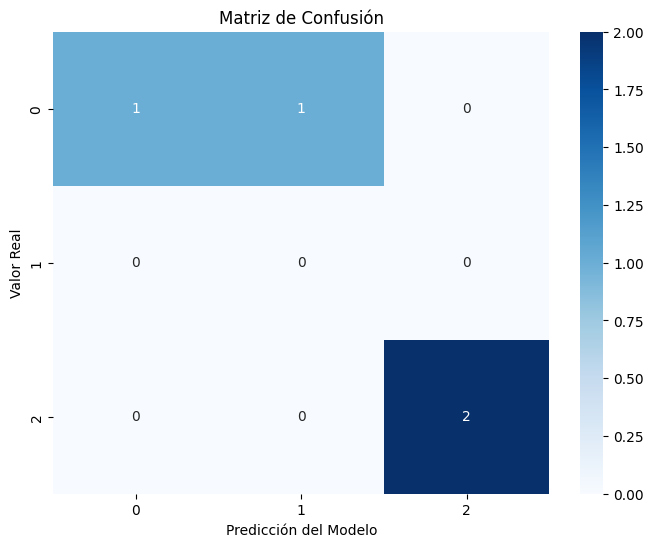

In [18]:

print("Accuracy del modelo:", accuracy_score(y_test, y_predd))
print("\n--- Reporte de Clasificación ---")
print(classification_report(y_test, y_pred))


plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicción del Modelo")
plt.ylabel("Valor Real")
plt.show()

* Conclusiones*

En este proyecto, se construyó un modelo de clasificación para predecir el 'size' (tamaño) de las razas de perros a partir de sus características.

**Variables Relevantes (Feature Selection):**
Mediante el método SelectKBest, se identificaron las 5 características más influyentes para predecir el tamaño del perro. (Aquí puedes mencionar las variables específicas que te salieron en el Paso 4, por ejemplo: `trainability`, `energy_level`, `barking`, `friendliness`, `lifespan`). Estas variables fueron cruciales para construir un modelo más eficiente y con menor dimensionalidad.

**Rendimiento del Modelo (Random Forest Classifier):**
El modelo alcanzó una **precisión general (Accuracy) del 0.75** en el conjunto de prueba. Esto indica que el modelo es capaz de predecir correctamente el tamaño de los perros en el 75% de los casos.

Al analizar el reporte de clasificación y la matriz de confusión se observó que el modelo mostró un **rendimiento excelente para la Clase 2**, logrando una precisión y recall del 100%. Para la **Clase 0**, el modelo tuvo una buena precisión (1.00) pero un recall más bajo (0.50), lo que sugiere que algunos perros de esta clase fueron mal clasificados.

Un punto crítico fue la **Clase 1**, la cual no estuvo representada en el conjunto de prueba (`support = 0`), impidiendo una evaluación significativa para esta categoría. Esto resalta la importancia de la distribución de las clases en los conjuntos de entrenamiento y prueba, especialmente con datasets pequeños.

**Limitaciones y Posibles Mejoras Futuras:**
La principal limitación observada fue el **tamaño reducido del dataset**, especialmente del conjunto de prueba, lo que generó un desbalance y la ausencia de algunas clases en la evaluación. Para futuras iteraciones, se recomienda:
* **Adquirir un dataset más grande y diverso** que contenga más muestras para todas las categorías de `size`.
* **Implementar técnicas de re-muestreo** (como SMOTE) si el desbalance de clases persiste en un dataset más grande.
* **Explorar otros algoritmos de clasificación** o **realizar un ajuste de hiperparámetros** más exhaustivo en el Random Forest para optimizar su rendimiento.
* Considerar el uso de **validación cruzada (Cross-Validation)** para obtener una estimación más robusta del rendimiento del modelo, especialmente con datasets pequeños.

En general, el proyecto ha demostrado la capacidad de aplicar un pipeline completo de Machine Learning, desde la selección de características hasta la evaluación del modelo, sentando las bases para futuros análisis más profundos.